In [36]:
# %% Imports
from visualization import *
unique_id = "02523ea98ad3459a90cd6e3a74291d67"

save_ext = 'seed'
suffix = None

In [37]:
config = recover_config(unique_id, save_ext=save_ext, suffix=suffix)
vocab_size = config["vocab_size"]
length = config["seq_length"]
sparsity_index = config["sparsity_index"]
ffn_dim = config["ffn_dim"]
assert config["save_weights"], f"Weights were not saved for ID {unique_id}."

save_dir, _ = get_paths(save_ext, suffix=suffix)
save_dir = save_dir / unique_id
weights = pickle.load(open(save_dir / "weights.pkl", "rb"))
losses = pickle.load(open(save_dir / "losses.pkl", "rb"))
test_losses = pickle.load(open(save_dir / "test_losses.pkl", "rb"))
accs = pickle.load(open(save_dir / "accs.pkl", "rb"))
test_accs = pickle.load(open(save_dir / "test_accs.pkl", "rb"))

DEVICE = "cpu"

# modules

config = ModelConfig(
    vocab_size=config["nb_emb"],
    emb_dim=config["emb_dim"],
    seq_length=config["seq_length"],
    ffn_dim=config["ffn_dim"],
    ffn_bias=config["ffn_bias"],
)
model = Model(config)
model.eval()
model.to(DEVICE)
norm = RMSNorm()

# variables

kwargs = {
    "DEVICE": DEVICE,
    "vocab_size": vocab_size,
    "sparsity_index": sparsity_index,
    "length": length,
    "ffn_dim": ffn_dim,
    "losses": losses,
    "test_losses": test_losses,
    "accs": accs,
    "test_accs": test_accs,
    "text_fontsize": 8,
    "title_fontsize": 12,
    "pos_marker": "o",
    "neg_marker": "s",
    "third_marker": "^",
}


# plot configurations

plot_functions = {
    "show_token_emb": show_token_emb,
    "show_pos_emb": show_pos_emb,
    "show_emb": show_emb,
    "show_norm_emb": show_norm_emb,
    "show_attn": show_attn,
    "show_value": show_value,
    "show_seq_emb": show_seq_emb,
    "show_level_line": show_level_line,
    "show_norm_input": show_norm_input,
    "show_mlp_receptors": show_mlp_receptors,
    "show_mlp_emitters": show_mlp_emitters,
    "show_mlp_output": show_mlp_output,
    "show_output_level_lines": show_output_level_lines,
    "show_output": show_output,
    "show_loss": show_loss,
    "show_acc": show_acc,
}



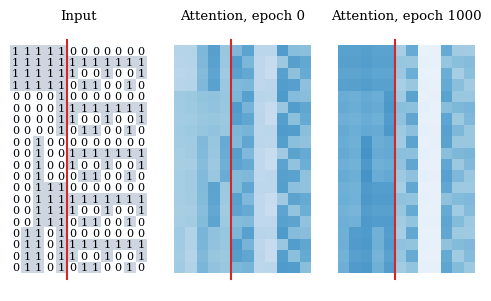

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(6, 4))
for i, frame in enumerate([0, 0, 1000]):
    model.load_state_dict(weights[frame])
    variables = ComputationCache(
        {
            "weights": weights[frame],
            "model": model,
            "norm": norm,
            "frame": frame,
        }
        | kwargs
    )
    if i == 0:
        attn =  variables["attn"]
        tmp = variables['pos_inputs']
        axes[i].imshow(tmp, cmap="Blues", vmin=0, vmax=1, alpha=0.2)
        axes[i].plot([4.5, 4.5], [-1, len(attn)], color="C3")
        for j in range(tmp.shape[0]):
            for k in range(tmp.shape[1]):
                axes[i].text(k, j, str(tmp[j, k].item()), ha='center', va='center', size=8)
        axes[i].set_title("Input")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_frame_on(False)
    else:
        show_attn(axes[i], variables)
        axes[i].set_title(f"Attention, epoch {frame}")
fig.savefig("attn.pdf", bbox_inches="tight")